## Desafío entregable #5: Estructurando un proyecto de DS, parte III

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('Spotify_Track_Dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [4]:
df.head(5)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


## Data Cleaning

### Tratamiento de datos tipo NaN

In [5]:
df = df.dropna()
df.isna().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Se procede a eliminar canciones con registros del tipo NaN, en entregas anteriores se vió que sólo una cancion posee variables vacías o nulas. 

### Tratamiento de outliers

En entregas anteriores se observó que existen numerosos outliers en el dataset, el gráfico inmediatamente abajo ilustra tal situación. Se buscó eliminar sólo aquellos que sean muy distorsivos en las distribuciones, evitando reducir severamente el número de entradas en el dataset.

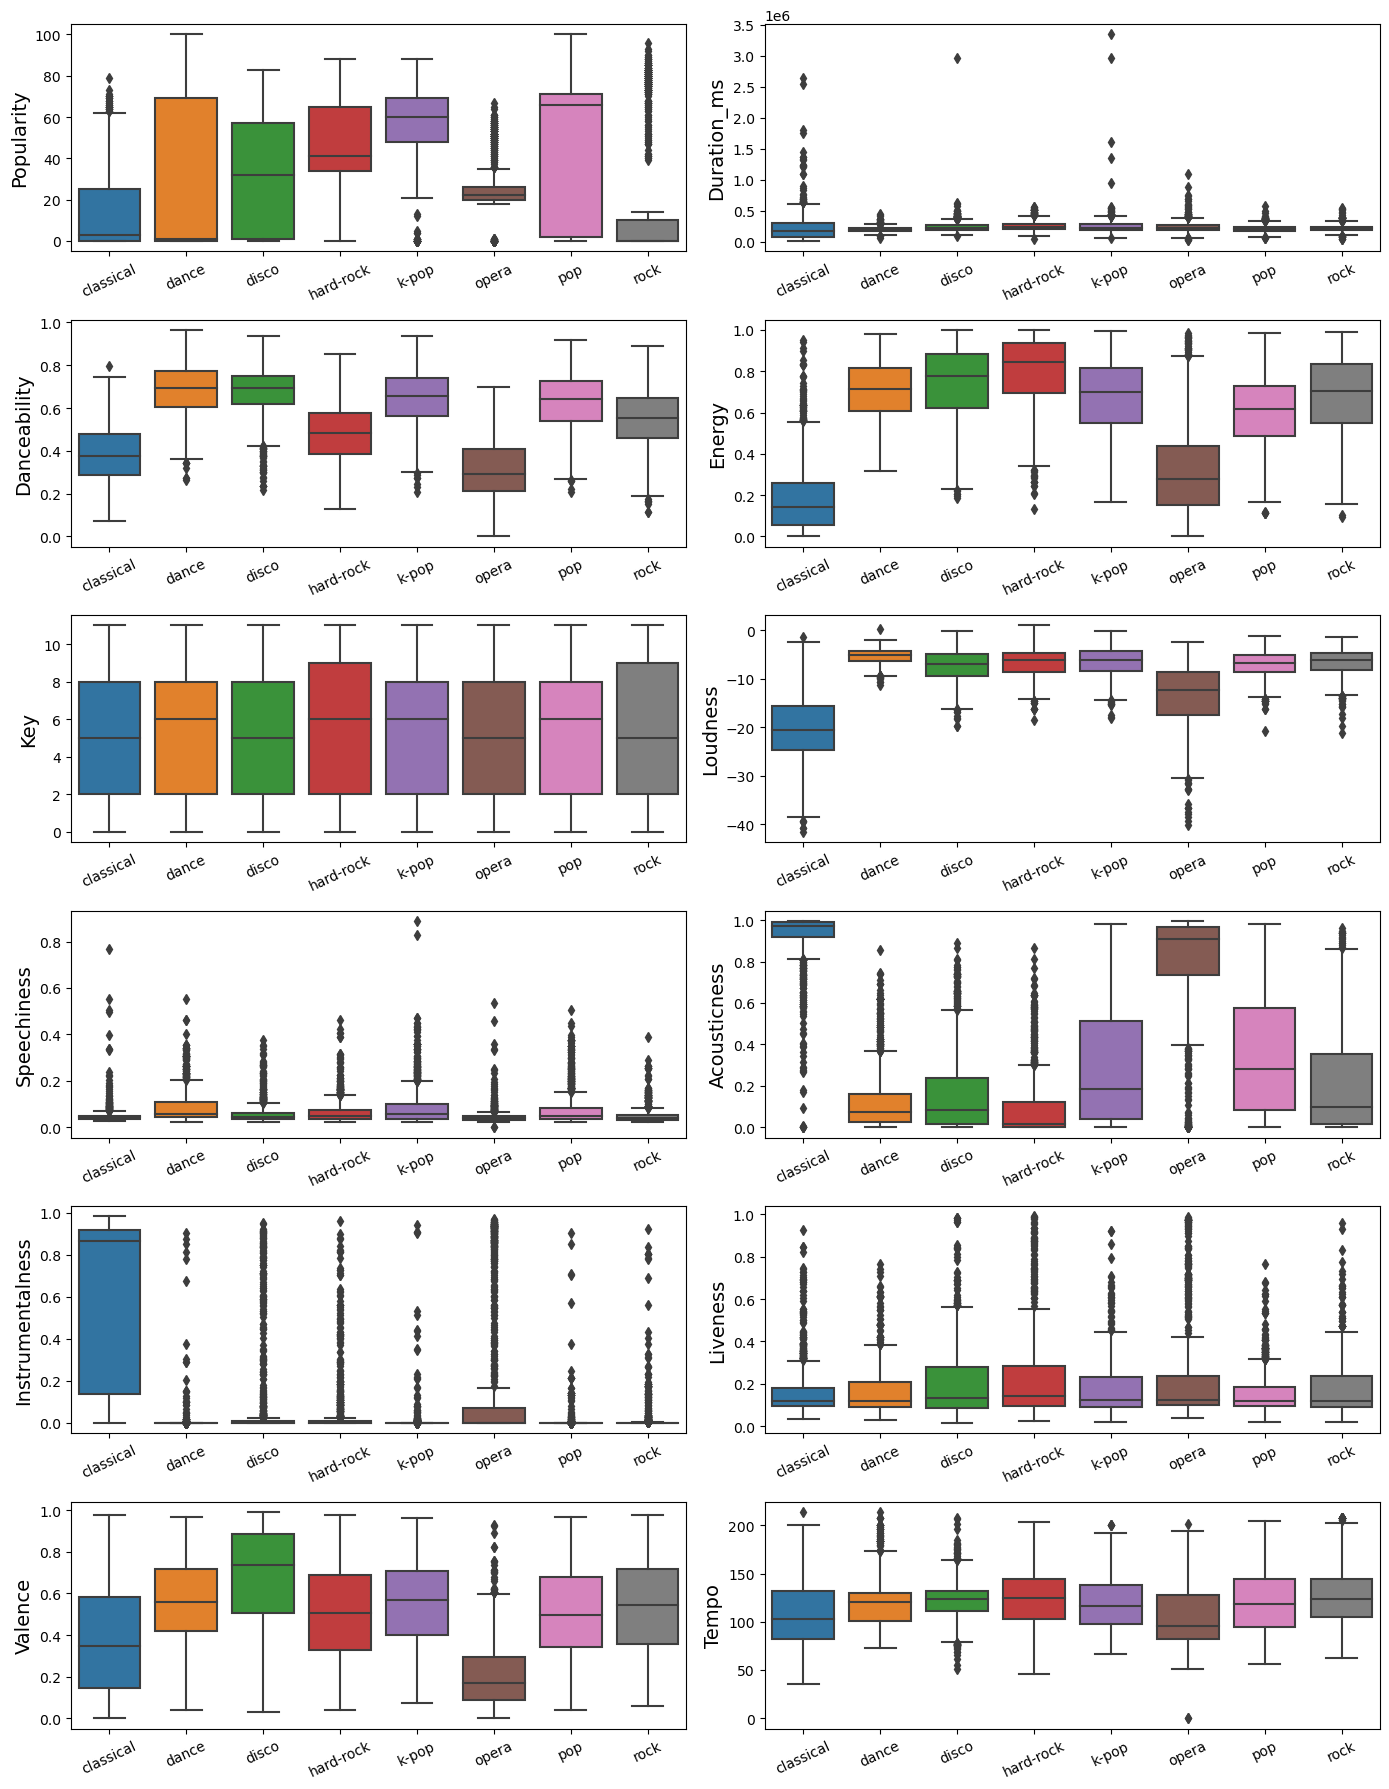

In [6]:
df_seleccion = df[df['track_genre'].isin(['classical', 'opera', 'rock', 'hard-rock', 'pop', 'k-pop', 'dance', 'disco'])]
columns = df_seleccion.columns[5:-2] # Selecciono los parámtros que considero más relevantes
l = [i for i in columns if i not in ['explicit', 'mode']]

plt.figure(figsize = (14, 18))
      
for x, column in zip(range(12), df_seleccion[l]):
    plt.subplot(int(len(l)/2), 2, x+1)
    sns.boxplot(data = df_seleccion, y = column, x = df_seleccion['track_genre']) 
    plt.xticks(rotation = 25)
    plt.xlabel("")
    plt.ylabel(l[x].capitalize(), fontsize = 14)
    
plt.tight_layout()

In [7]:
df_filtro = df[(np.abs(stats.zscore(df['duration_ms'])) < 3)]

Sólo fueron removidos los outliers de la variable "duration_ms", debido a que el criterio que se toma es el de dejar fuera aquellos registros que se aparten en ± 3σ (desviaciones estándar). Esto supone que la distribución es normal, lo que no se cumple para la mayoría de las variables. Abajo se muestran de nuevo los gráficos de caja pero con los outliers eliminados.

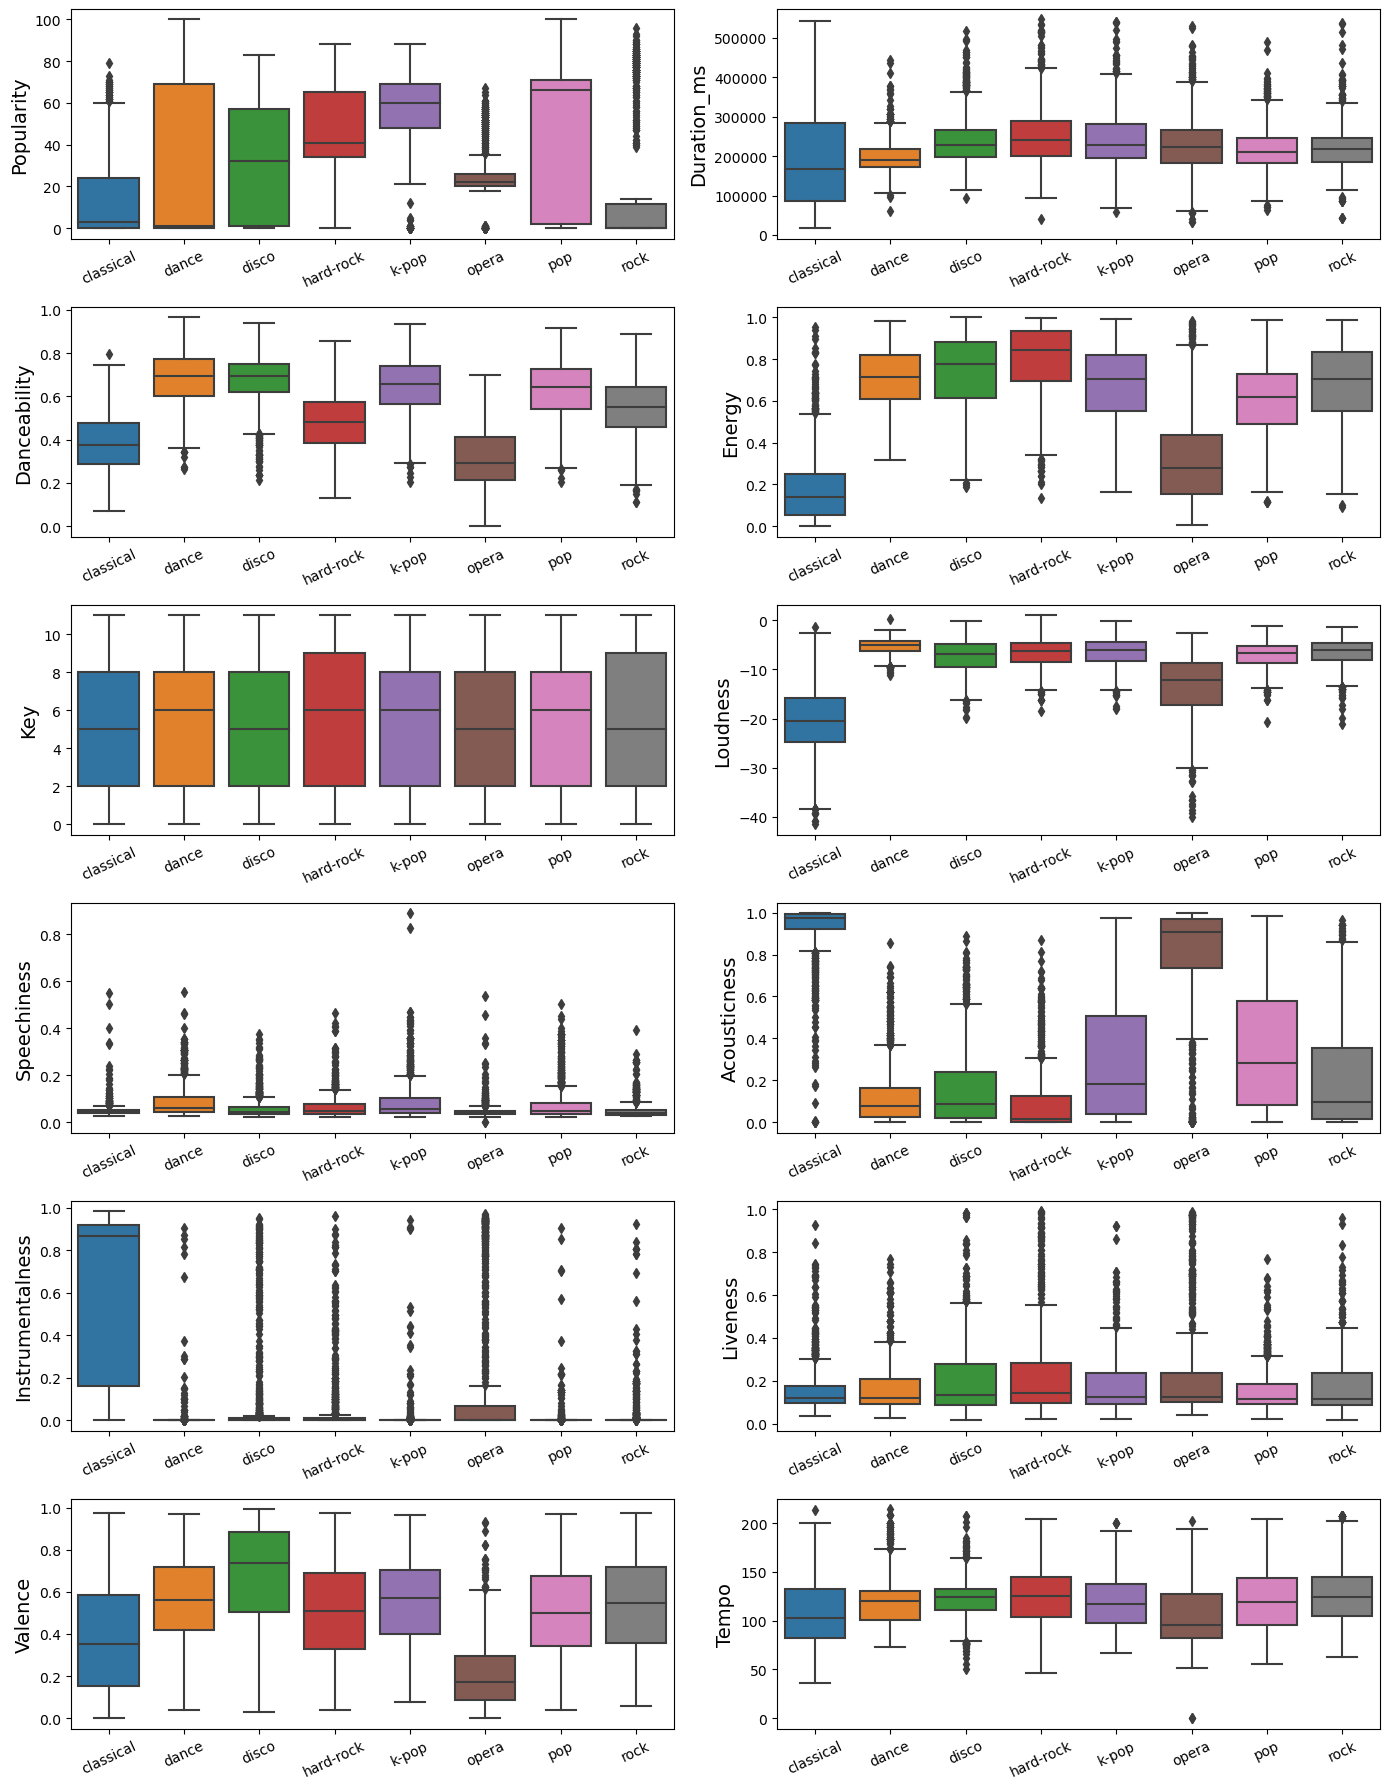

In [8]:
df_seleccion = df_filtro[df_filtro['track_genre'].isin(['classical', 'opera', 'rock', 'hard-rock', 'pop', 'k-pop', 'dance', 'disco'])]
columns = df_seleccion.columns[5:-2] # Selecciono los parámtros que considero más relevantes
l = [i for i in columns if i not in ['explicit', 'mode']]

plt.figure(figsize = (14, 18))
      
for x, column in zip(range(12), df_seleccion[l]):
    plt.subplot(int(len(l)/2), 2, x+1)
    sns.boxplot(data = df_seleccion, y = column, x = df_seleccion['track_genre']) 
    plt.xticks(rotation = 25)
    plt.xlabel("")
    plt.ylabel(l[x].capitalize(), fontsize = 14)
    
plt.tight_layout()

Se observa que se eliminaron algunos outliers, quedando varios, esto se debe a que estas variables no poseen una distribución normal.

In [9]:
print(df_filtro.shape)
print(df.shape[0] - df_filtro.shape[0])

(113053, 21)
946


Al final del proceso se eliminaron 946 outliers, número razonablemente bajo frente al total 114.000 entradas del dataset.

In [10]:
df1 = df_filtro.copy()

## Data Wranging

In [11]:
df1.drop('Unnamed: 0', axis = 1, inplace = True)

In [12]:
df1['duration_min'] = (df1['duration_ms']/(60 * 1000)).round(2)
df1.drop('duration_ms', axis = 1, inplace = True)

In [13]:
df1['loudness_db'] = - df1['loudness']
df1.drop('loudness', axis = 1, inplace = True)

Se eliminó la columna "Unnamed: 0" que sólo indica el número de fila, se expresó la duración de las canciones en minutos (en lugar de milisegundos) y se modificó la columna "loudness" para que informe valores positivos.

In [14]:
print('El máximo número de co-artistas en el dataset es de', int(max(df1['artists'].str.count(';'))) + 1)

df1[['artist_1', 'artist_2', 'artist_3']] = df1['artists'].str.split(';', 2, expand=True)
df1.drop('artists', axis = 1, inplace = True)

El máximo número de co-artistas en el dataset es de 38


Hay canciones que poseen más de un intérprete, se muestran en la variable "artists" separados por punto y coma (;). Contando el número máximo de ocurrencias de ";" se encontró que hay al menos una canción con ¡38 artistas! Separar los artistas creando columnas nuevas para 38 diferentes intérpretes es impráctico, se crearon entonces sólo tres columnas: "artist_1", "artist_2" y "artist_3", de esta forma se tiene como máximo tres artistas por canción.

## Reducción de la dimensionalidad (Feature Selection)

In [15]:
# import mlxtend
# from mlxtend.feature_selection import SequentialFeatureSelector as SFS

Por alguna razón no logré que VSC reconozca que a mlxtend a pesar de estar instalado. Usaremos la herramienta de SequentialFeatureSelector incluida en el paquete Scikit-learn. Lamentablemente SequentialFeatureSelector no parece tener la opción Stepwise. 

In [16]:
from sklearn import preprocessing
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [17]:
ord_enc = preprocessing.OrdinalEncoder()
df1['track_genre'] = ord_enc.fit_transform(df1[['track_genre']])
df1['track_genre']

0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
          ...  
113995    113.0
113996    113.0
113997    113.0
113998    113.0
113999    113.0
Name: track_genre, Length: 113053, dtype: float64

Se usó la variable "track_genre" como la variable principal, la cual está compuesta por strings. Para salvar este inconveniente se utilizó el algoritmo OrdinalEncoder para transformalo en datos tipo float.

In [18]:
X = df1.drop(['track_genre', 'track_id', 'album_name', 'track_name', 'explicit', 'mode', 'key', 'time_signature', 'artist_1', 'artist_2', 'artist_3'], axis = 1) 

y = df1['track_genre']

print(X.columns.size)

11


Se excluyó en la matriz X varias variables categóricas, tales como artistas, y variables que presentan una distribución discontínua y muy alejada de una distribución normal. Esto se hizo para mantener el tiempo de ejecución del algoritmo SequentialFeatureSelector en tiempos razonables.

In [19]:
X2 = X.iloc[::15,:] 
y2 = y.iloc[::15]

Dado que el dataset posee 113.054 registros, lo que hace que el proceso de reducción de dimensionalidad sea muy lento se decidió utilizar sólo uno cada 15 registros, aproximadamente 7.500 registros. De esta manera los tiempos se reducen notablemente.

Se utilizó el algoritmo KNeighborsClassifier, con k = 5 para realizar el proceso de Feature Selection, tomando como métrica la precisión. Se seleccionó 3, 5, 7 , 9 y 10 variables en cada caso, la cual se denominan Sprint 3, Sprint 5, ..., y Sprint 10. Se emplearon las direcciones "forward" y "backward". 

### Forward Feature Selector

In [20]:
knn = KNeighborsClassifier(n_neighbors = 5)

forw = {}

for i in [3, 5, 7, 9, 10]:
    forw[f'sfs_{i}'] = SequentialFeatureSelector(knn, n_features_to_select = i)
    forw[f'sfs_{i}'].fit(X2, y2)
    print(f'Las {i} variables seleccionadas son:', list(X2.columns[forw[f'sfs_{i}'].get_support()]))
    forw[f'sfs_{i}_var'] = X2.columns[forw[f'sfs_{i}'].get_support()]

Las 3 variables seleccionadas son: ['popularity', 'danceability', 'acousticness']
Las 5 variables seleccionadas son: ['popularity', 'danceability', 'speechiness', 'acousticness', 'instrumentalness']
Las 7 variables seleccionadas son: ['popularity', 'danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'valence']
Las 9 variables seleccionadas son: ['popularity', 'danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'duration_min']
Las 10 variables seleccionadas son: ['popularity', 'danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'duration_min', 'loudness_db']


### Backward Feature Selector

In [21]:
knn = KNeighborsClassifier(n_neighbors = 5)

back = {}

for i in [3, 5, 7, 9, 10]:
    back[f'sfs_{i}'] = SequentialFeatureSelector(knn, n_features_to_select = i, direction = 'backward')
    back[f'sfs_{i}'].fit(X2, y2)
    print(f'Las {i} variables seleccionadas son:', list(X2.columns[back[f'sfs_{i}'].get_support()]))
    back[f'sfs_{i}_var'] = X2.columns[back[f'sfs_{i}'].get_support()]

Las 3 variables seleccionadas son: ['popularity', 'tempo', 'loudness_db']
Las 5 variables seleccionadas son: ['popularity', 'energy', 'tempo', 'duration_min', 'loudness_db']
Las 7 variables seleccionadas son: ['popularity', 'energy', 'speechiness', 'liveness', 'tempo', 'duration_min', 'loudness_db']
Las 9 variables seleccionadas son: ['popularity', 'energy', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_min', 'loudness_db']
Las 10 variables seleccionadas son: ['popularity', 'danceability', 'energy', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_min', 'loudness_db']


Se observa que las variables seleccionadas según la dirección forward o backward difieren notablemente. Se utilizaron modelos de KNeighborsClassifier usando las variables seleccionada en cada caso y se evaluarán las métricas.

### KN con Forward Feature Selector

In [22]:
knn = KNeighborsClassifier(n_neighbors = 5, n_jobs = -1)

accuracy_forw, precision_forw, recall_forw, f1_forw = [], [], [], []

for i in [3, 5, 7, 9, 10]:
    X_i = X[list(X2.columns[forw[f'sfs_{i}'].get_support()])]
    X_train, X_test, y_train, y_test = train_test_split(X_i, y, random_state = 42)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_forw.append(accuracy_score(y_test, y_pred))
    precision_forw.append(precision_score(y_test, y_pred, average = 'macro'))
    recall_forw.append(recall_score(y_test, y_pred, average = 'macro'))
    f1_forw.append(f1_score(y_test, y_pred, average = 'macro'))

### KN con Backward Feature Selector

In [23]:
knn = KNeighborsClassifier(n_neighbors = 5, n_jobs = -1)

accuracy_back, precision_back, recall_back, f1_back = [], [], [], []

for i in [3, 5, 7, 9, 10]:
    X_i = X[list(X2.columns[back[f'sfs_{i}'].get_support()])]
    X_train, X_test, y_train, y_test = train_test_split(X_i, y, random_state = 42)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_back.append(accuracy_score(y_test, y_pred))
    precision_back.append(precision_score(y_test, y_pred, average = 'macro'))
    recall_back.append(recall_score(y_test, y_pred, average = 'macro'))
    f1_back.append(f1_score(y_test, y_pred, average = 'macro'))

### Comparación de Feature Selectors

In [24]:
comparacion_forw = pd.DataFrame({'Modelo': ['Sprint 3', 'Sprint 5', ' Sprint 7', 'Sprint 9', 'Sprint 10'], 'Accuracy': accuracy_forw, 'Precision': precision_forw, 'Recall': recall_forw, 'F1': f1_forw})

comparacion_back = pd.DataFrame({'Modelo': ['Sprint 3', 'Sprint 5', ' Sprint 7', 'Sprint 9', 'Sprint 10'], 'Accuracy': accuracy_back, 'Precision': precision_back, 'Recall': recall_back, 'F1': f1_back})

In [25]:
comparacion_forw.round(2)

,Modelo,Accuracy,Precision,Recall,F1
0,Sprint 3,0.13,0.15,0.13,0.13
1,Sprint 5,0.16,0.18,0.16,0.16
2,Sprint 7,0.19,0.21,0.19,0.19
3,Sprint 9,0.20,0.22,0.20,0.20
4,Sprint 10,0.18,0.20,0.18,0.18


In [26]:
comparacion_back.round(2)

,Modelo,Accuracy,Precision,Recall,F1
0,Sprint 3,0.11,0.13,0.11,0.11
1,Sprint 5,0.14,0.15,0.14,0.14
2,Sprint 7,0.14,0.16,0.14,0.14
3,Sprint 9,0.14,0.16,0.15,0.15
4,Sprint 10,0.15,0.17,0.15,0.15


Se observa que el Forward Feature Selector produjo métricas ligeramente superiores a las de Backbard Feature Selector, siendo el Sprint 9 el que produjo mejores resultados. Abajo se muestra un gráfico de barras ilustrando las metricas obtenidas. Las métricas obtenidas son realmente bajas, el valor más alto obtenido es el de la precisión y no supera el 22%, analizaremos si variando el número de vecinos (k) del KNeighbors los resultados mejoran.

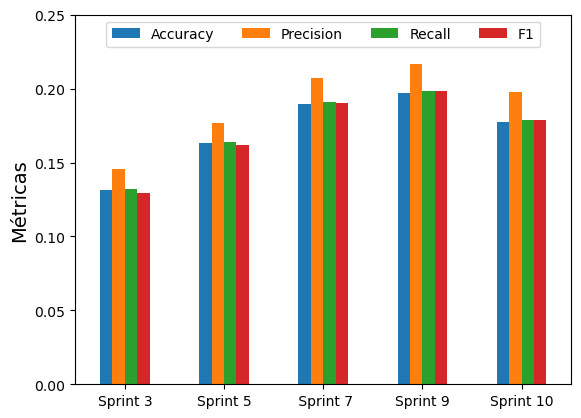

In [27]:
comparacion_forw.plot(x = 'Modelo', kind = 'bar')
plt.xticks(rotation = 0)
plt.xlabel('')
plt.ylabel('Métricas', fontsize = 14)
plt.ylim(None, 0.25)
plt.legend(loc = 'upper center', ncol = 4)
plt.show()

In [28]:
accuracy_tun, precision_tun, recall_tun, f1_tun = [], [], [], []

for i in [3, 5, 7, 9, 10, 12, 15, 18, 21, 24, 27, 30]:
    knn = KNeighborsClassifier(n_neighbors = i, n_jobs = -1)
    X_9 = X[list(X2.columns[forw[f'sfs_{9}'].get_support()])]
    X_train, X_test, y_train, y_test = train_test_split(X_9, y, random_state = 42)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_tun.append(accuracy_score(y_test, y_pred))
    precision_tun.append(precision_score(y_test, y_pred, average = 'macro'))
    recall_tun.append(recall_score(y_test, y_pred, average = 'macro'))
    f1_tun.append(f1_score(y_test, y_pred, average = 'macro'))

In [29]:
tunning = pd.DataFrame({'Modelo': [f'Neighbors {i}' for i in [3, 5, 7, 9, 10, 12, 15, 18, 21, 24, 27, 30]], 'Accuracy': accuracy_tun, 'Precision': precision_tun, 'Recall': recall_tun, 'F1': f1_tun})

tunning.round(2)

,Modelo,Accuracy,Precision,Recall,F1
0,Neighbors 3,0.19,0.21,0.19,0.19
1,Neighbors 5,0.20,0.22,0.20,0.20
2,Neighbors 7,0.21,0.22,0.21,0.21
3,Neighbors 9,0.21,0.21,0.21,0.20
4,Neighbors 10,0.21,0.21,0.21,0.21
5,Neighbors 12,0.21,0.22,0.22,0.21
6,Neighbors 15,0.21,0.22,0.22,0.21
7,Neighbors 18,0.21,0.22,0.22,0.21
8,Neighbors 21,0.22,0.21,0.22,0.21
9,Neighbors 24,0.22,0.21,0.22,0.21


Al variar el número de vecinos no se obtiene ningún beneficio, las métricas cambian muy poco. El valor por defecto k = 5 parece ser el óptimo.

## Conclusiones

Tomando como variable principal el género de las canciones, se buscó por medio del algoritmo KNeighborsClassifier clasificar las canciones por medio de las variables presentes en la matriz X buscando predecir el género al que pertencen.

Usando métodos de reducción de la dimensionalidad acoplados al KNeighborsClassifier se logró determinar que con nueve de las once variables se obtienen mejores resultados. Además se observó que variando el número de vecinos k no se obtenenian mejores clasificaciones. 

Las métricas obtenidas son bajas, podemos establecer una serie de razones de esto. Primero, el dataset está compuesto por más de 100 géneros musicales, muchos son muy similares entre sí, lo dificulta la tarea de clasificación. Segundo, puede que el algoritmo seleccionado no sea el idóneo para esta tarea, existen otros algoritmos de clasificación y serán explorados en el Proyecto Complementario I. Por otro lado, tambien podría resultar de utilidad explorar algoritmos de clustering para realizar el sistema de clasificación/recomendación.